# Linear Regression

Regression applies to learning problems in which the output is real valued and continuous (outputs do not fit into discrete categories). First, import the required modules.

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, FormatStrFormatter)
import numpy as np
import sklearn.datasets
import math
%matplotlib inline

## Convenience Functions

Use the `make_regression` function of scikit learn to generate a sample dataset with a single feature (see *univariate* below). Return the coefficient and recreate the linear function from which the dataset is generated. Also wrap matplotlib OOP style API calls in a special function that returns a set of axes with the preferred configuration.

In [45]:
def uni_linear_regression_dataset():
    r = sklearn.datasets.make_regression(n_samples = 200,
                                         n_features = 1,
                                         noise=10.0,
                                         coef=True)
    return r[0].reshape(200,), r[1], r[2]

def f(w_1, x, w_0):
    return w_1 * x + w_0

def new_plot():
    fig = plt.figure(dpi=300)
    ax = fig.add_subplot(1,1,1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('auto')
    return fig, ax

## Univariable Linear Regression

The process of fitting a straight line to an $x$/$y$ dataset is called *univariate linear regression*, univariate refering to the single output variable $y$. In the most simple case, $x$ is a single value, though in more complicated cases $\mathbf{x}$ is a vector of values, linear regression applies to these cases equally well. Sometimes a function with a vector of inputs is called *multivariable* or even *multivariate*, despite having just one dependent variable.

A simple linear function $h$ with one independent value is of the form $y=mx+c$, or in data science $y=w_1x+w_0$. The vector $\mathbf{w}$ is the vector of weights: $\langle w_0, w_1 \rangle$. The function of $x$ with weights $\mathbf{w}$ is:

$$h_{\mathbf{w}}=w_1x+w_0$$

The ambition with linear regression is to calculate the values of the weights in $\mathbf{w}$ so that $h$ approximates the relationship between $x$ and $y$, by minimising loss. First, create the regression algorithm in the special case that $x$ is a single value, then generalise to a *n*-dimensional vector. 

### Loss Function

The loss for a single training example is a measure of how bad the current model is. Mean square loss is appropriate as it always returns a positive value.

$$g(w_0, w_1) = (h_{\mathbf{w}}(x) - y)^2$$

Average loss over many examples:

$$g(w_0, w_1) = \frac{1}{N}\sum_{n=1}^{N}(h_{\mathbf{w}}(x_n) - y_n)^2$$

These two functions, expressed in code:

In [5]:
def _mse(y_pred, y_actual):
    return (y_pred - y_actual) ** 2

def mse(y_actual, y_pred):
    loss = 0.0
    for i in range(y_actual.size):
        loss += _mse(y_pred[i], y_actual[i])
    return loss/y_actual.size

Compare the cost for a fitted function (for which the paramters are already know) with a line of gradient 1, for example. The fitted function has a much smaller cost.

In [6]:
x,y,m = uni_linear_regression_dataset()
print(mse(y, f(m, x, 0))) # small cost
print(mse(y, f(1, x, 0))) # large cost

98.72505111720218
4168.6452977282315


### Stochastic Gradient Descent

To perform regression, a function must be fitted to a dataset. For univariate linear regression, the paramaters can be computed exactly from the derivative of the loss function, though a different approach is required to fit more complex functions.

To this end, the weight space is traversed to find a suitable minimum by repeatedly adjusting the weights for each element $x$ in the training set, making a small step in the direction of steepest descent, according to the *learning rate* $\alpha$. If the loss represents how poor the current model is on a training example, the learning process should **minimise** this loss and hence the term *gradient descent* is preffered over hill-climbing.

Where $\mathbf{w}$ is the vector of weights as before, the gradient descent algorithm updates each weight by taking the partial derivative of the losss function $L$ with respect to that weight for each point $x$.

$$w_i \leftarrow w_i - \alpha \frac{\delta}{\delta w_i}L(x)$$

In [7]:
def SGD1(a, w_0, w_1, y, x):
    for i in range(x.size):
        w_0 -= (a * (f(w_1, x[i], w_0) - y[i]))
        w_1 -= (a * (f(w_1, x[i], w_0) - y[i]) * x[i])
    return w_0, w_1

Use this method to fit a function to a new regression problem:

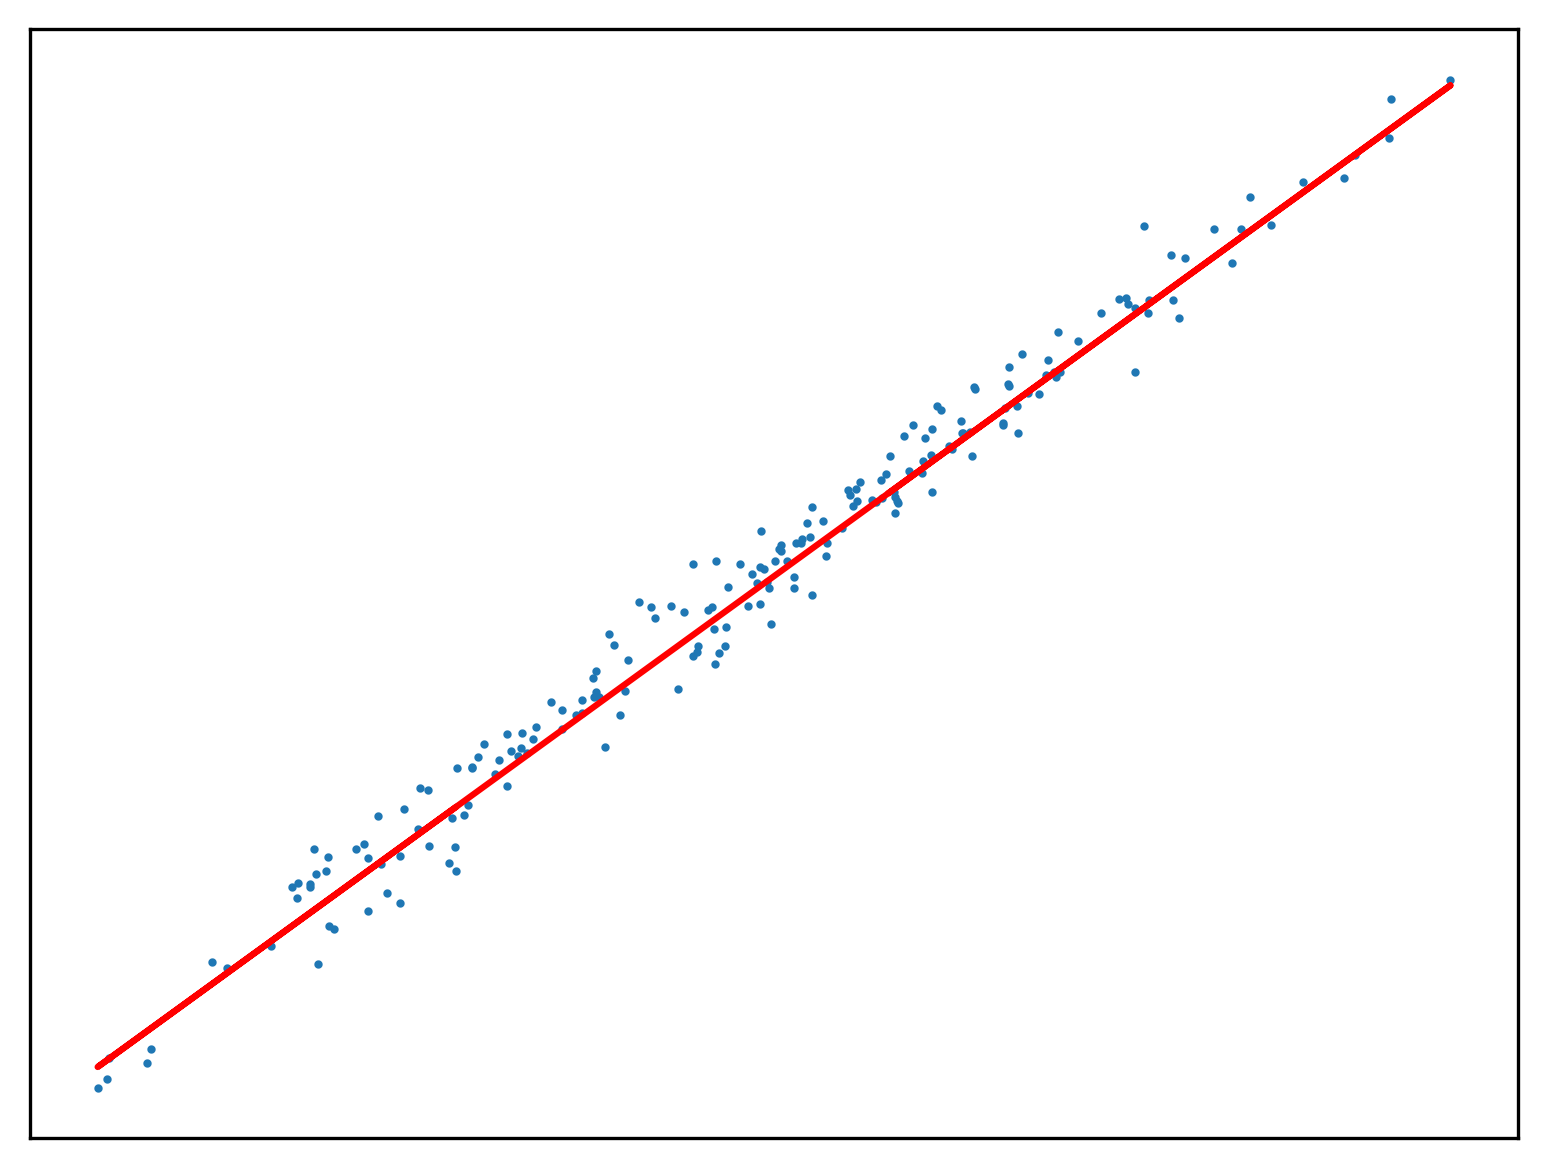

In [8]:
x,y,m = uni_linear_regression_dataset()
w_0 = w_1 = 0.0

w_0, w_1 = SGD1(0.1, w_0, w_1, y, x)

fig, ax = new_plot()
ax.scatter(x,y, s=1)
ax.plot(x, f(w_1, x, w_0), 'red')

### Deterministic Gradient Descent

Adopting the stochastic approach to gradient descent, the function is tuned after calculating the loss of each element in $x$. An *epoch* is a step that observes all training examples. In *deterministic* gradient descent, the total cost for a whole epoch is determined and used to make a single adjustment to $\mathbf{w}$, again according to the learning rate.

In [9]:
def DGD1(a, w_0, w_1, y, x):
    w_0 -= (a * sum([f(w_1, x[i], w_0) - y[i] for i in range(x.size)]))
    w_1 -= (a * sum([(f(w_1, x[i], w_0) - y[i]) * x[i] for i in range(x.size)]))
    return w_0, w_1

Use this method to fit a function to a new regression problem, over a number of epochs:

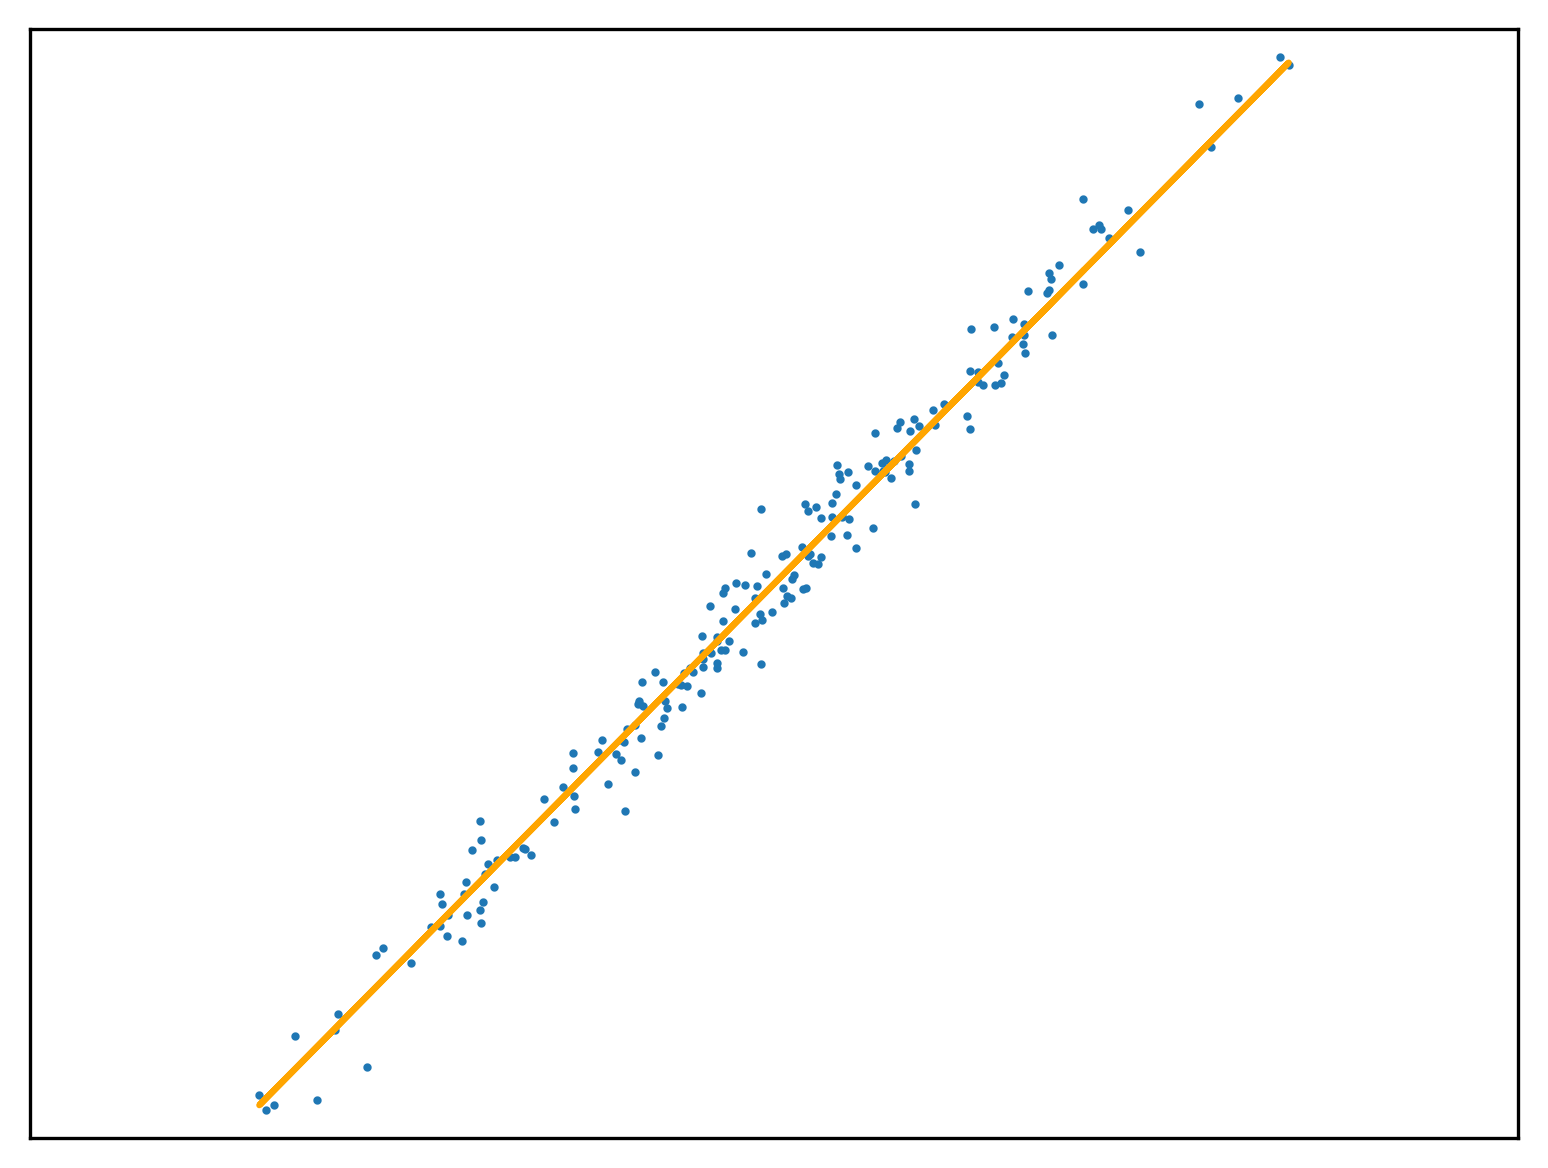

In [44]:
x,y,m = uni_linear_regression_dataset()
w_0 = 0
w_1 = 0
fig, ax = new_plot()

def animate(epoch):
    global w_0
    global w_1
    global ax
    ax.clear()
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(np.min(x)-1,np.max(x)+1)
    ax.set_ylim(np.min(y)-10,np.max(y)+10)
    ax.scatter(x,y, s=1)
    if epoch > 0 and epoch < 23:
        w_0, w_1 = DGD1(0.001, w_0, w_1, y, x)
    if epoch < 23:
        ax.plot(x, f(w_1, x, w_0), 'orange')
    else:
        ax.plot(x, f(w_1, x, w_0), 'green')

anim = animation.FuncAnimation(fig=fig, func=animate, frames=25, interval=10)
anim.save('../animations/epochs.gif')

### Mini-batch Gradient Descent

The stochastic gradient descent algorithm seen before is a special case of *mini-batch* gradient descent. The loss of all the points within a mini-batch within the training set are used to calculate a change to the vector of weights. This is often preferred over both approaches seen so far as it converges faster than element by element SGD, without the resource utilisation of fully determinisic gradient descent.

In [25]:
def SGD(a, n, w_0, w_1, y, x):
    x = x.reshape(-1, n)
    y = y.reshape(-1, n)
    for i in range(x.shape[0]):
        w_0 -= (a * sum([f(w_1, x[i][j], w_0) - y[i][j] for j in range(x[i].shape[0])]))
        w_1 -= (a * sum([(f(w_1, x[i][j], w_0) - y[i][j]) * x[i][j] for j in range(x[i].shape[0])]))
    return w_0, w_1

Use this method to fit a function to a new regression problem:

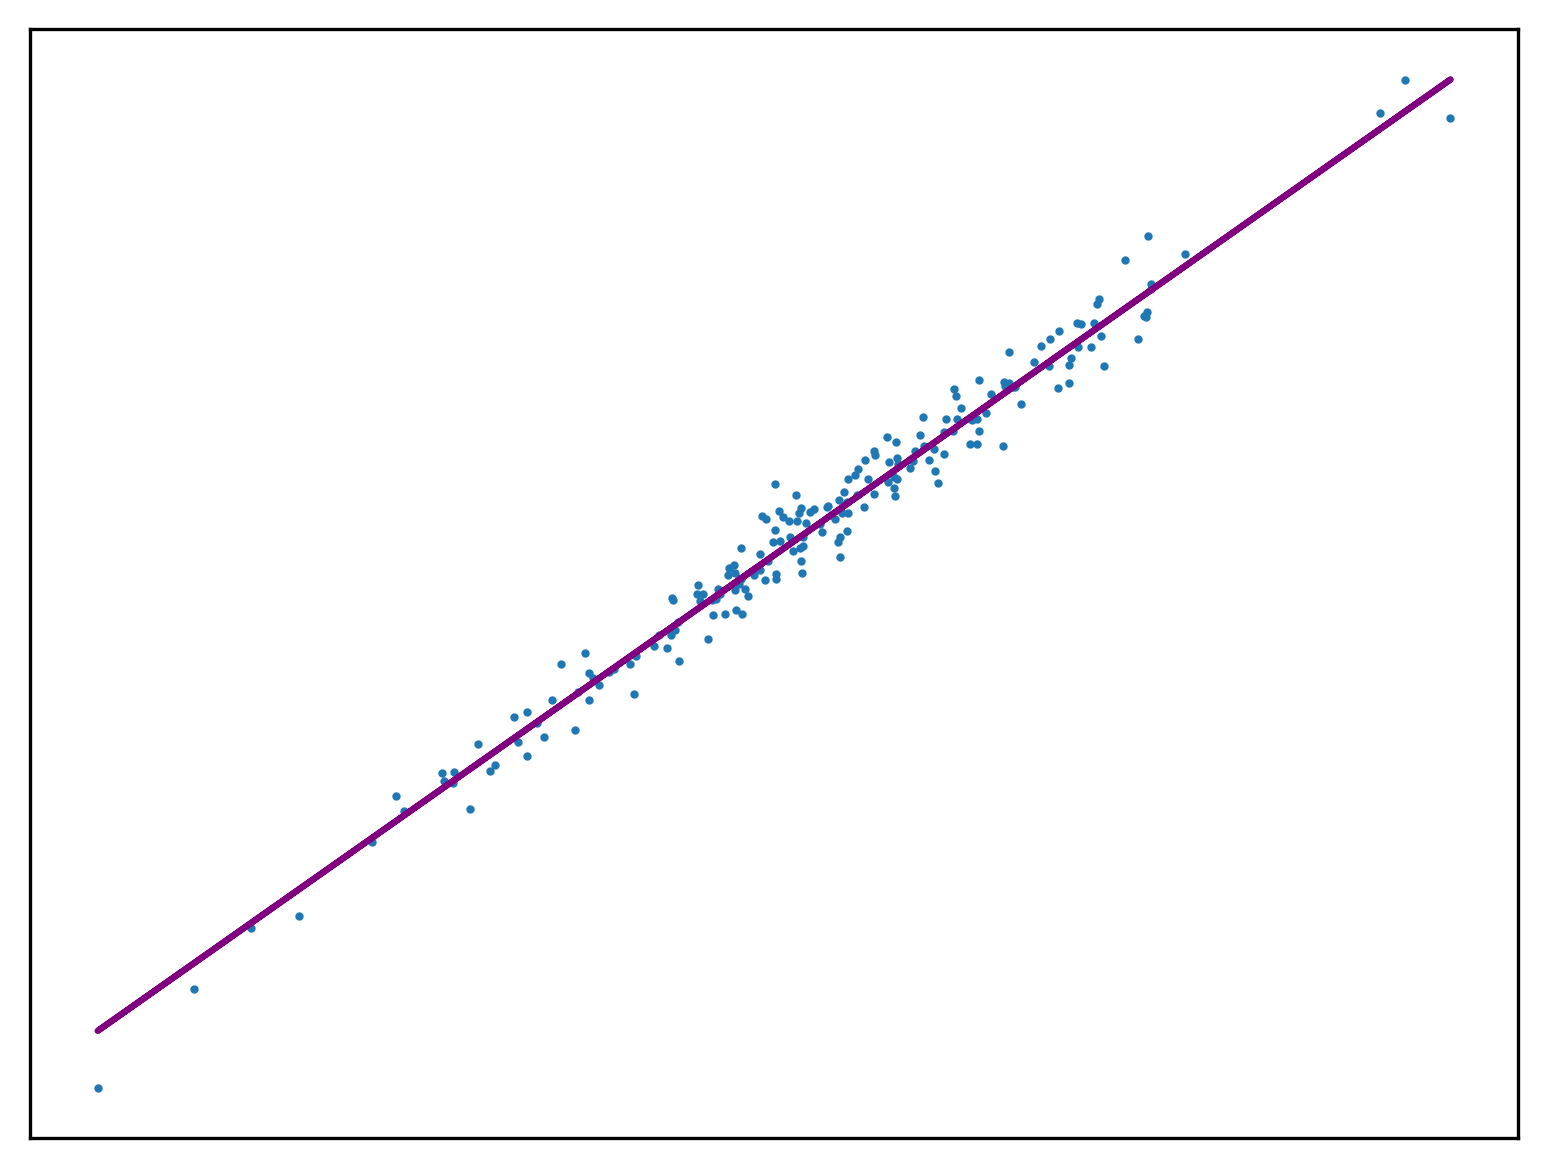

In [26]:
x,y,m = uni_linear_regression_dataset()
w_0 = w_1 = 0.0

for _ in range(1000):
    w_0, w_1 = SGD(0.01, 10, w_0, w_1, y, x)

fig, ax = new_plot()
ax.scatter(x,y, s=1)
ax.plot(x, f(w_1, x, w_0), 'purple')

## Multivariable Linear Regression

Multivariable linear regression applies to problems where each independent variable in the training dataset is a *n*-variable vector, rather than a single value.

$$h_\mathbf{w}(\mathbf{x}_j) = w_0 + w_ix_{j,1} + \cdots +w_nx_{j,n} = w_0 + \sum_{i=1}^{n}w_ix_{j,i}$$

The weight $w_0$ is the intercept. The function $h_\mathbf{w}$ can be simplified by introducing a new variable $x_0$ with the value 1, making $h_\mathbf{w}$ the product of the transposed weight vector with each corresponding element in $x$, $x_j$:

$$h_\mathbf{w}(\mathbf{x}_j) = \mathbf{w^{T}x_j} = \sum_{i = 0}^{n}w_ix_{j,i}$$

With this assignment, the partial derivative of the loss function with respect to each $w$ is the same.

$$w_i \leftarrow w_i - \alpha \sum_j(h_{\mathbf{w}}(\mathbf{x}_j) - y_j) \times x_{j,i}$$

To solve this problem, create some utility functions and rewrite the stochastic gradient descent algorithm to handle an *n*-dimensional input vector.

In [29]:
def create_minibatches(a, m):
    n = int(x.shape[0] / m)
    return np.array_split(a[:m * n], n), n

def h(W, X):
    return sum(W * X)

def vector_SGD(a, m, W, y, X):
    X = np.concatenate((np.ones((X.shape[0],1), dtype=int), X), axis=1)
    X, n = create_minibatches(X, m)
    y, n = create_minibatches(y, m)
    for b in range(n):
        for w in range(W.size):
            W[w] -= a * sum([((h(W, X[b][x])) - y[b][x]) * X[b][x][w] for x in range(X[b].shape[0])])
    return W

Use this method to fit a function to a new regression problem. In this case `X` is a 1 dimensional vector, proving this approach can function as before.

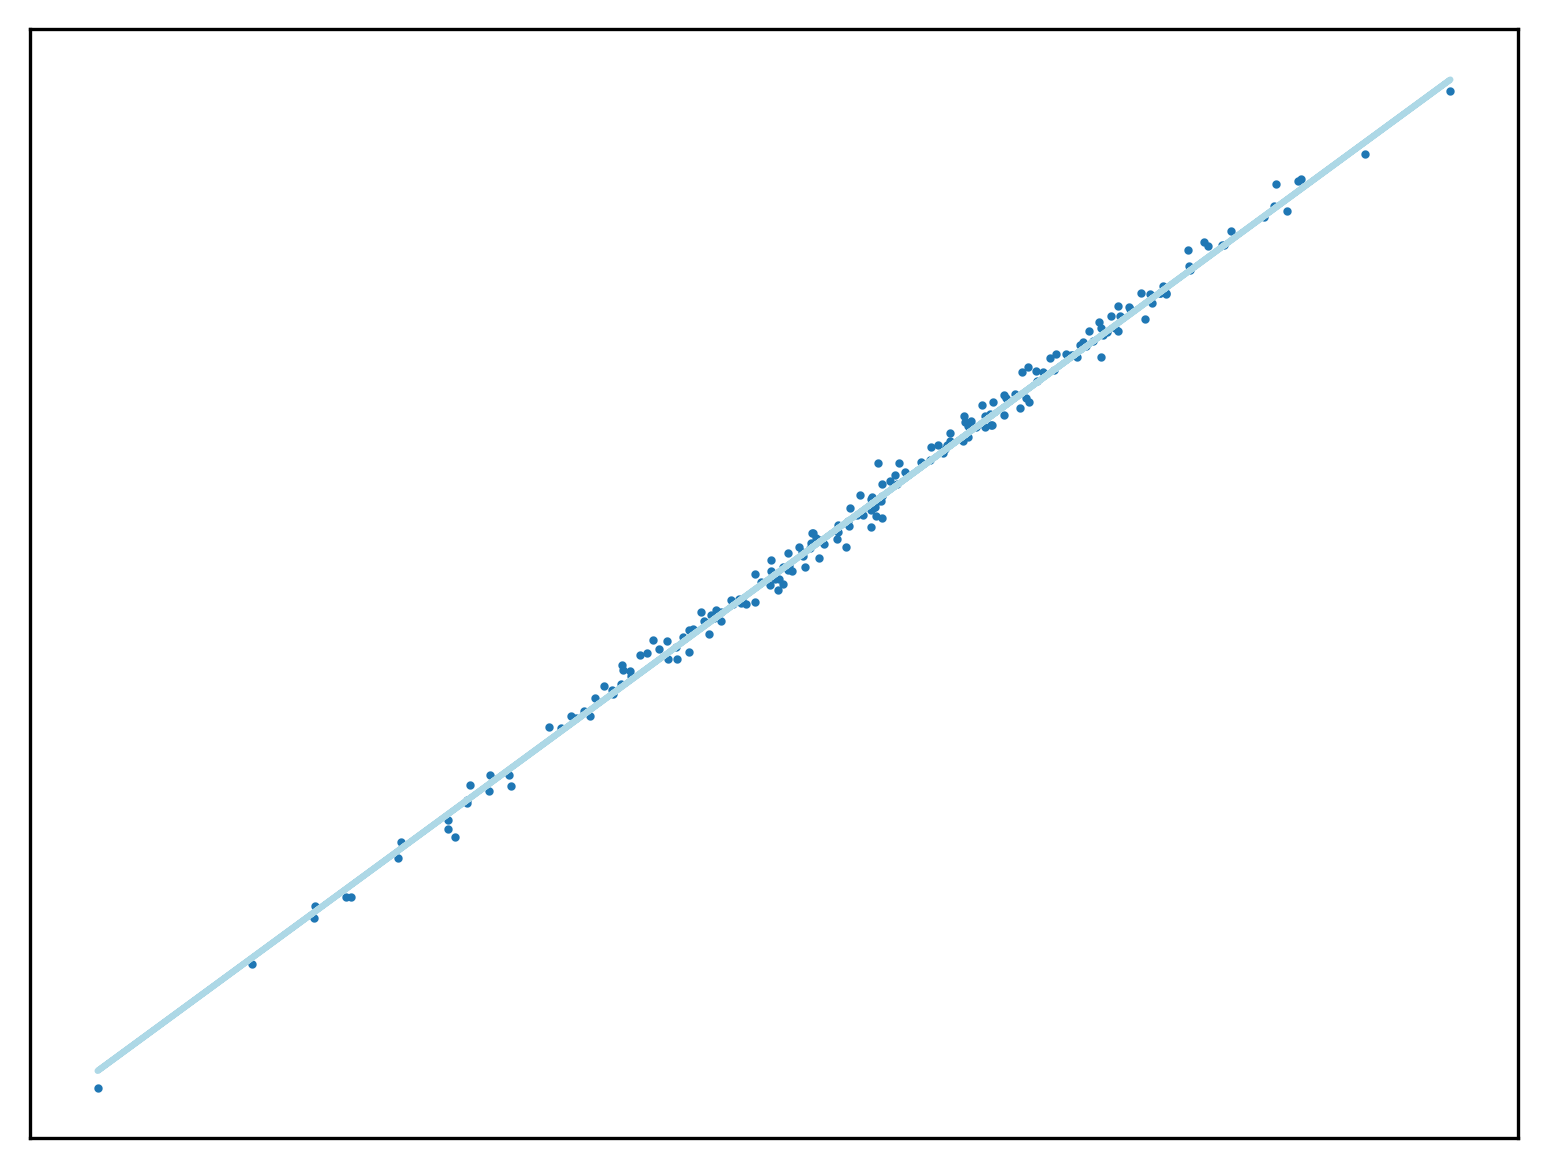

In [52]:
r = sklearn.datasets.make_regression(n_samples = 200, n_features = 1, noise=5.5, coef=True)
X = r[0]
y = r[1]
W = np.array([0,1])
W = vector_SGD(0.1, 10, W, y, X)
Z = np.concatenate((np.ones((200,1), dtype=int), X), axis=1)

fig, ax = new_plot()
ax.scatter(X,y, s=1)
ax.plot([Z[i][1] for i in range(Z.shape[0])], [h(W, Z[i]) for i in range(Z.shape[0])], 'lightblue')

A regression problem in which the input vector has two dimensions - the function's input has multiple variables - can be solved with this SGD method. In this example `X` has two dimensions, which is as many as can be visualised.

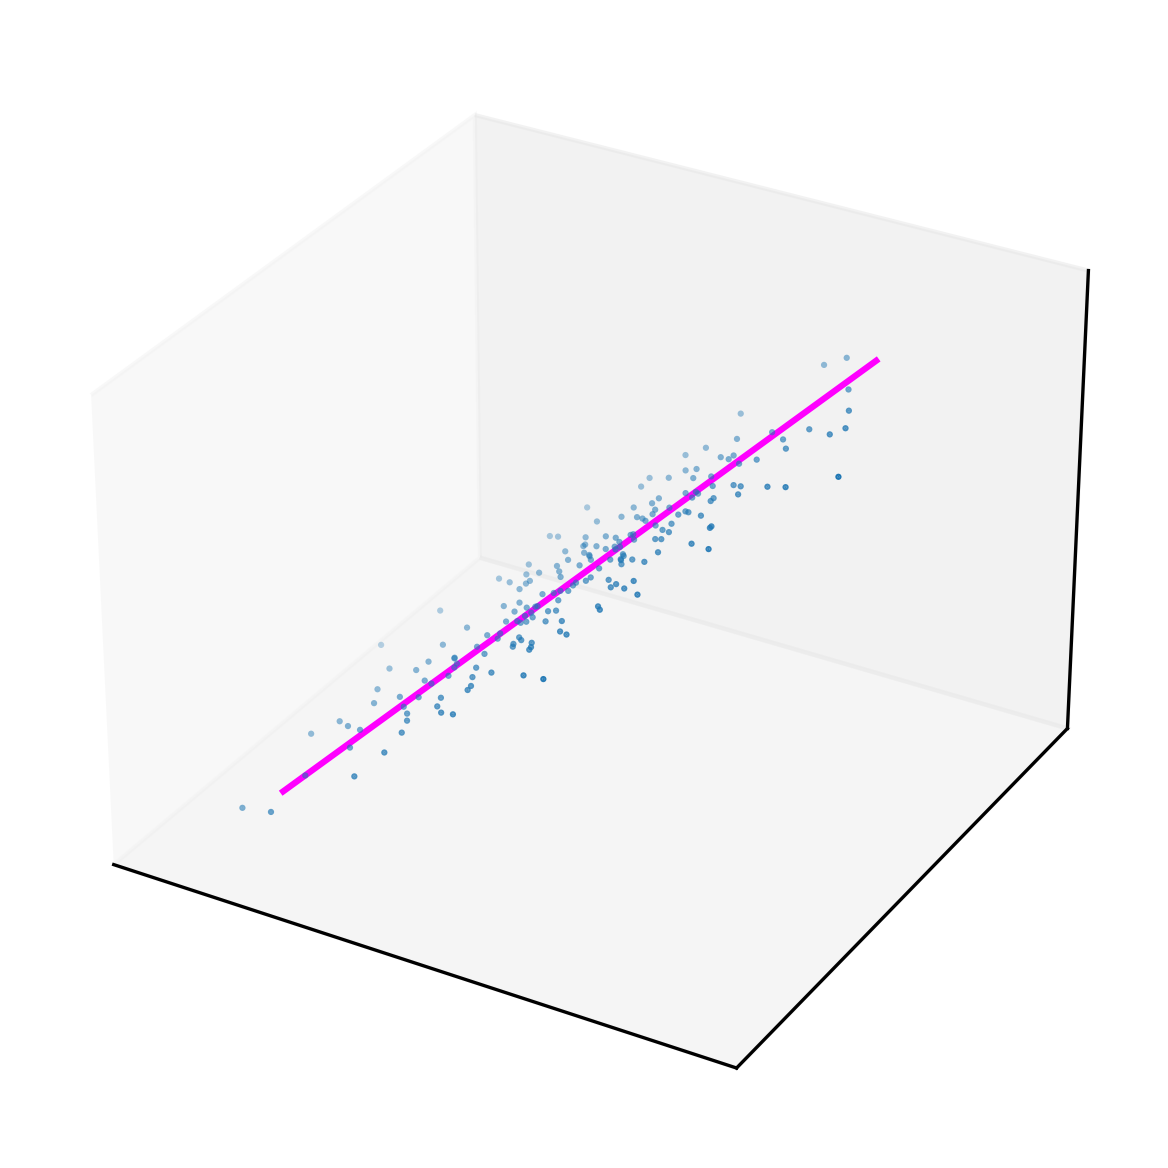

In [65]:
r = sklearn.datasets.make_regression(n_samples = 200,
                                     n_features = 2,
                                     coef=True)
X = r[0]
y = r[1]

Z = np.concatenate((np.ones((100,1), dtype=int),
                    np.linspace(-2, 2, 200).reshape(100,2)),
                   axis=1)

W = np.array([0,1,1])
W = vector_SGD(0.1, 10, W, y, X)

fig = plt.figure(dpi=300)
ax = fig.add_subplot(projection='3d')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.grid()
ax.scatter([X[i][0] for i in range(X.shape[0])],
           [X[i][1] for i in range(X.shape[0])],
           r[1], s=1, marker='.')
ax.plot([Z[i][1] for i in range(Z.shape[0])],
        [Z[i][2] for i in range(Z.shape[0])],
        [h(W, Z[i]) for i in range(Z.shape[0])],
        color='magenta')

## Non-linear Regression

Here is an example of how you might generate some data for the non-linear version of this problem.

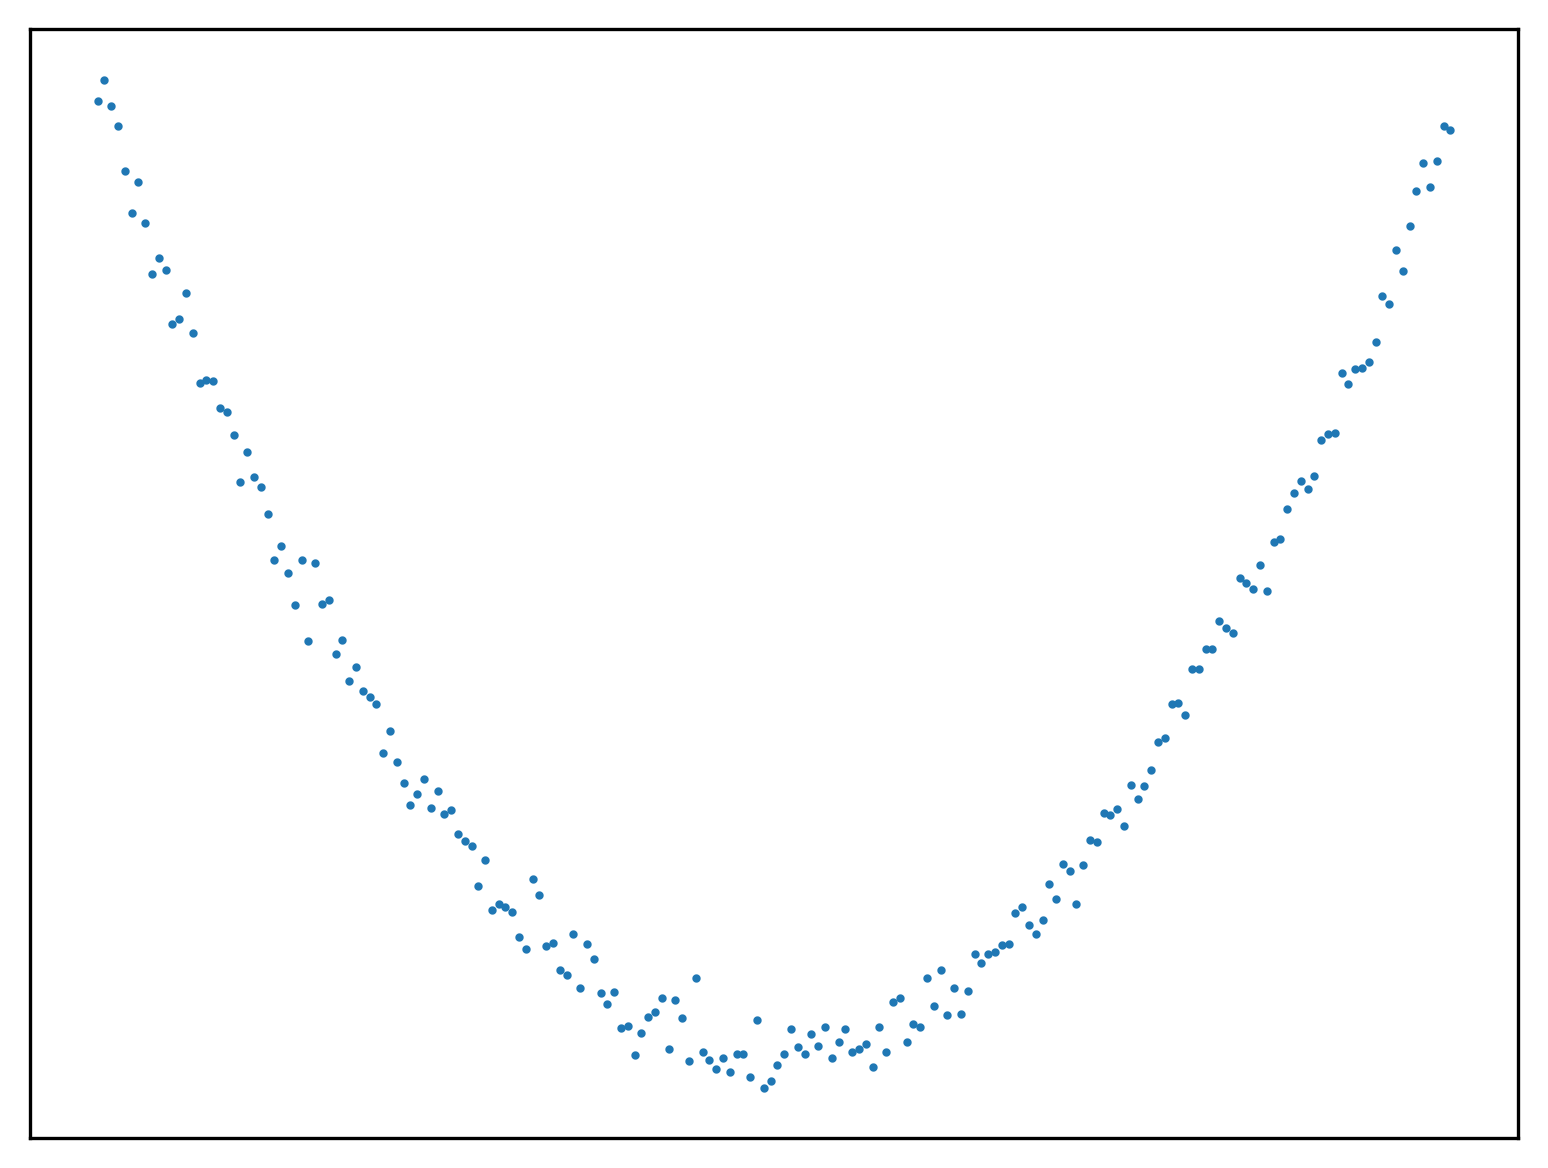

In [35]:
x = np.arange(-10, 10, 0.1)
y = np.power(x,2) + 2 * np.random.normal(size=x.size)

fig, ax = new_plot()
ax.scatter(x,y, s=1)